# Forbes Richest Athletes 

<img src="https://i.ytimg.com/vi/NPOdcCfyUnw/maxresdefault.jpg" width="700" height="500" />

**Data Dictionary**
1. Name: Name of the athlete.
2. Nationality: Name of the country the athlete belongs to.
3. Current Rank: Rank in the corresponding Year.
4. Previous Year Rank: Rank in in the preceding year.
5. Sport: Name of the sports that athlete played that year.
6. Year: Current year of ranking.
7. earnings ( million) : Earnings of the athlete in millions in the corresponding year. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Forbes+Richest+Athletes+1990-2019.csv")

In [4]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [5]:
df.isnull().sum()

Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [6]:
df.shape

(291, 7)

### Q1. Atheletes from which country have been listed most number of times in the Forbes Richest Athletes from 1990 to 2019?
[Hint: use countplot]

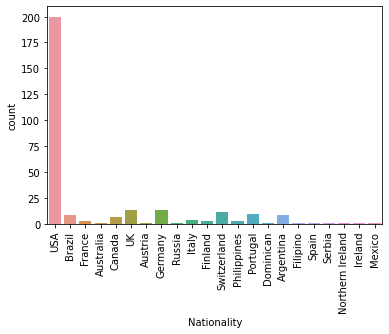

In [11]:
sns.countplot(df['Nationality'])
plt.xticks(rotation = 90)# This code display the country names on x-axis verticaly
plt.show()

### Q2. Make a plot visualizing year wise top earning (rank-1) athletes. In which year the rank 1 athlete earned the most? Which was the athlete who earned the most and what sport did he play? How much did the athlete earn?
[hint : use barplot]

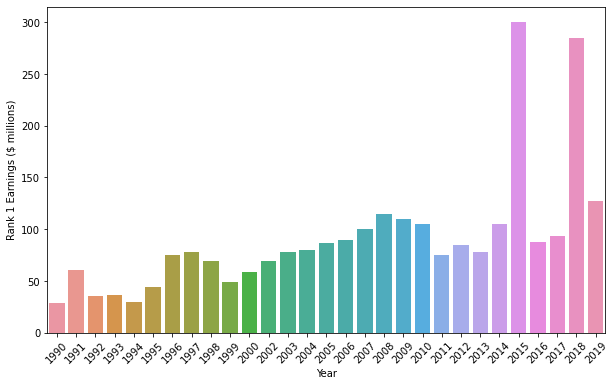

In [14]:
plt.figure(figsize = (10,6))
sns.barplot(df[df['Current Rank'] == 1]['Year'],df['earnings ($ million)'])
plt.xticks(rotation = 45)
plt.ylabel('Rank 1 Earnings ($ millions)')
plt.show()

In [15]:
df[df['Year'] == 2015].head(1)


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


### Q3. Which athlete has been most frequently ranked number 1 from 1990 to 2019? 
[Hint : use piechart]

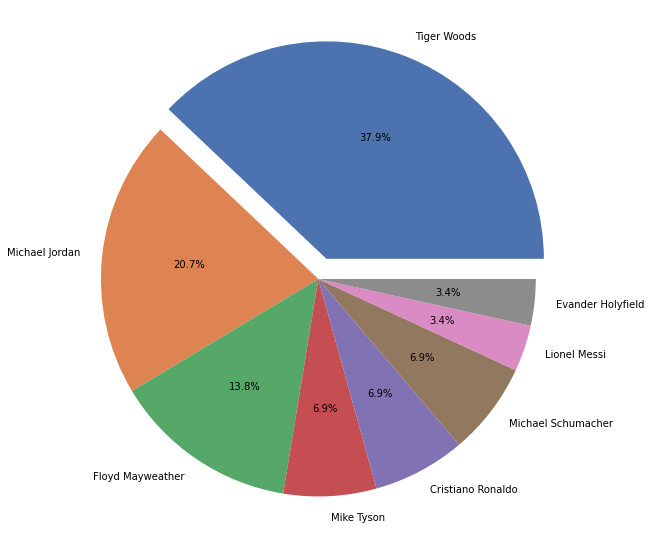

In [16]:
plt.figure(figsize = (10,10))
rank1_df = df[df['Current Rank'] == 1]
labels = rank1_df['Name'].value_counts().keys()
plt.pie(rank1_df['Name'].value_counts(), autopct="%.1f%%", explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0], labels=labels)
# autopct="%.1f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0] is used here to take the Tiger Woods portion little out(10%) of the pie-chart
plt.show()

### Q4. Players from which 2 sports have been listed least number of times in the Forbes RIchest Athletes List?
[Hint : Use swarmplot]

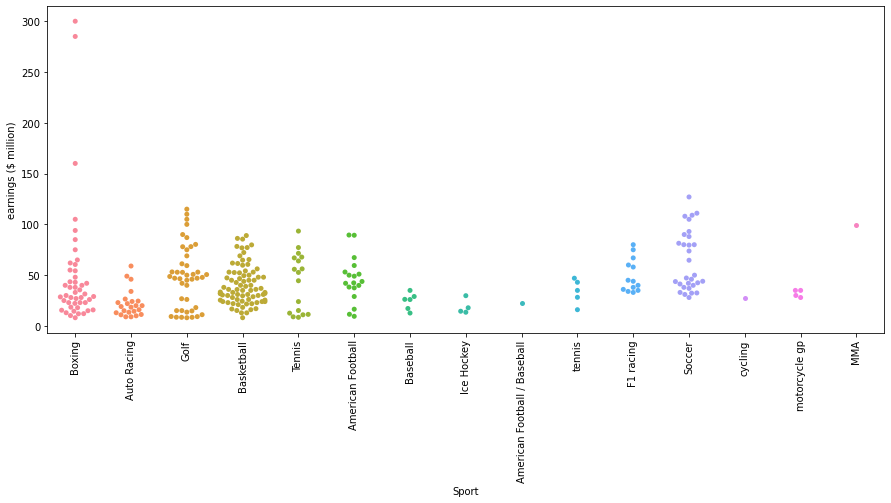

In [18]:
plt.figure(figsize = (15,6))
sns.swarmplot(df['Sport'],df['earnings ($ million)'])
plt.xticks(rotation = 90)
plt.show()


In [19]:
df[df["Sport"]=='American Football / Baseball']


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
52,Deion Sanders,USA,3,>10,American Football / Baseball,1995,22.5


### Q5. Discuss the relationship between Current rank and earnings with the help of a suitable plot.
[hint : use regplot]

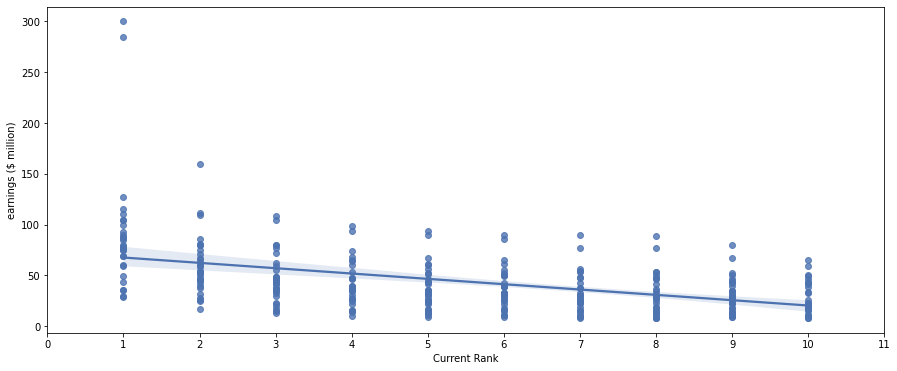

In [20]:
plt.figure(figsize = (15,6))
sns.regplot(df['Current Rank'],df['earnings ($ million)'])
plt.xticks(np.arange(0,12))
plt.show()

### Q6. Which sport has the highest spread in terms of earnings (highest IQR)?
[Hint : use boxplot]

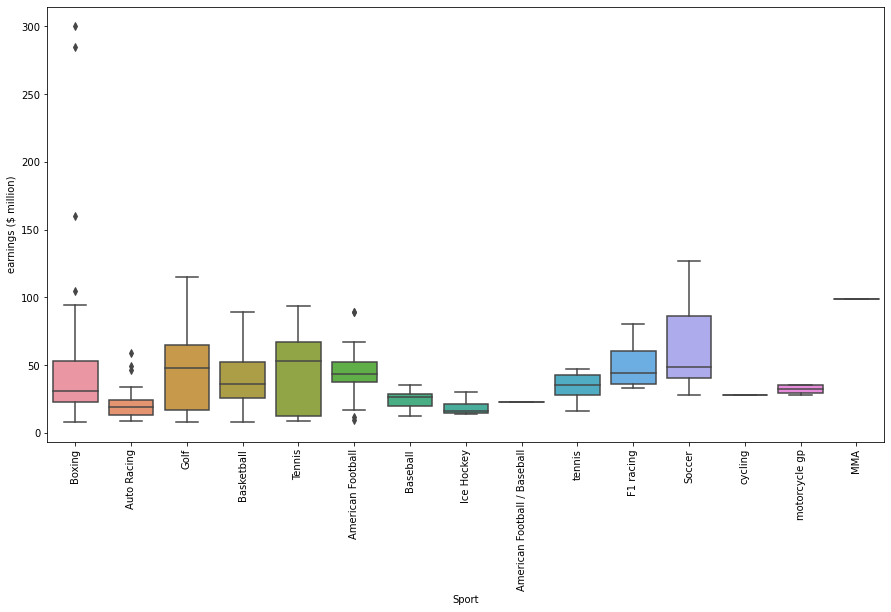

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(y = 'earnings ($ million)',x='Sport',data = df)
plt.xticks(rotation = 90)
plt.show()

### Q7. Show a trend in the positions at which Tiger Woods has appeared in the Forbes Richest Athletes list overs the years.
[Hint : Use lineplot]

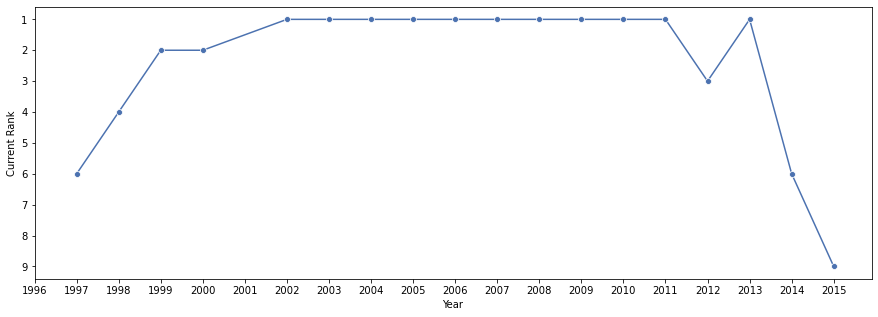

In [22]:
tigerW_df = df[df['Name'] == 'Tiger Woods']
plt.figure(figsize = (15,5))
sns.lineplot(tigerW_df['Year'],tigerW_df['Current Rank'],marker = 'o')
plt.gca().invert_yaxis()# This displays the Y-axis values in reverse order, other it would have been started from 1 to 9
plt.xticks(np.arange(1996,2016))
plt.show()

### Q8. Comment on the trend of the earnings of Tiger Woods overs the years.
[Hint : use lineplot]

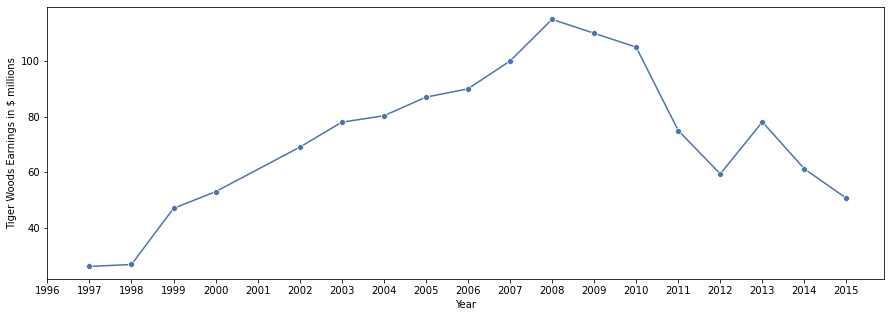

In [23]:
plt.figure(figsize = (15,5))
sns.lineplot(tigerW_df['Year'],tigerW_df['earnings ($ million)'],marker = 'o')
plt.xticks(np.arange(1996,2016))
plt.ylabel('Tiger Woods Earnings in $ millions')
plt.show()

### Q9. Display the distribution of the earnings of Tiger Woods. Comment on how the distribution looks like and interpret some insights from the plot.
[Hint : Use distplot]

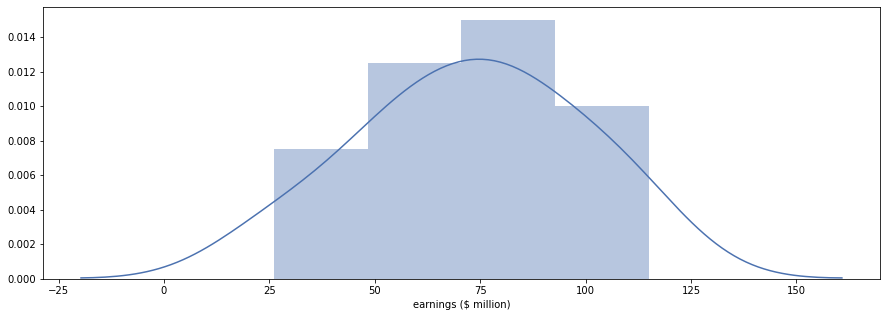

In [25]:
plt.figure(figsize = (15,5))
sns.distplot(tigerW_df['earnings ($ million)'])
plt.show()

In [26]:
tigerW_df['earnings ($ million)'].mean()


72.86111111111111

In [27]:
tigerW_df['earnings ($ million)'].median()


76.5

### Q10. Has the earnings of the richest athletes increased over the period of 30 years? Discuss the correlation between year and earnings.
[Hint : Use heatmap/scatterplot]

In [28]:
corr=df[["Year","earnings ($ million)"]].corr()
corr

,Year,earnings ($ million)
Year,1.000000,0.638597
earnings ($ million),0.638597,1.000000


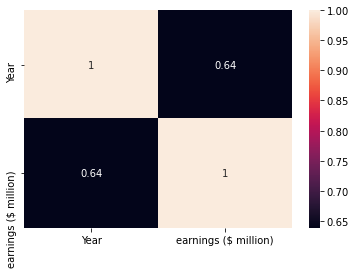

In [29]:
sns.heatmap(corr,annot = True)
plt.show()

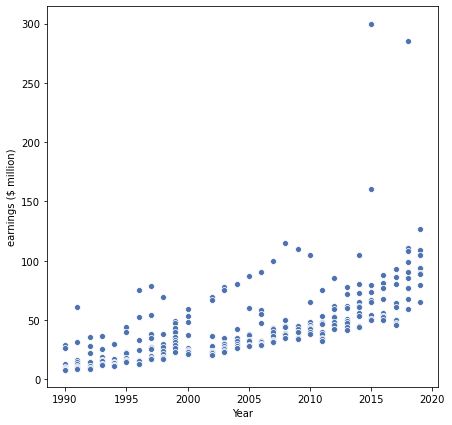

In [30]:
plt.figure(figsize = (7,7))
sns.scatterplot(df['Year'],df['earnings ($ million)'])
plt.show()

### Q-11 Display the earnings trend over the years.
[Hint: use lineplot(), estimator = np.mean]

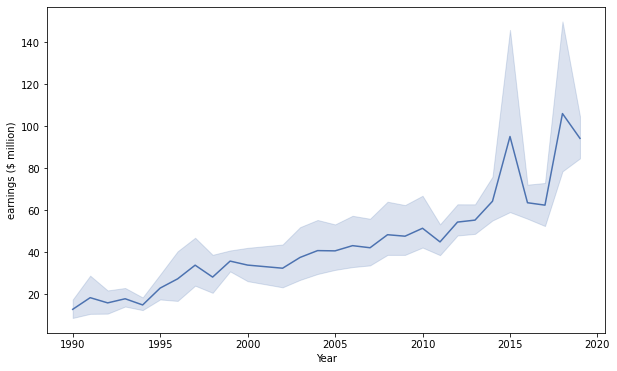

In [31]:
plt.figure(figsize = (10,6))
sns.lineplot(df["Year"],df['earnings ($ million)'],estimator=np.mean)
plt.show()

                                            **Happy Learning**